# <span style='color:blue'><span style=' background:yellow'><span style='font-family:"Times New Roman'> **GOOGLE PLAY STORE DATA ANALYSIS** </span></span> </span>


>In this project I'm going to analyse the data of google play store apps,like:
* how many number of apps are there 
* what is their status 
* their ratings
* genres, updates etc.
>For that I'm going to use tools like:
* pandas 
*  numpy 
* seaborn  
* matplotlib and python.

## Downloading the Dataset

i have downloaded my dataset from **'https://www.kaggle.com/datasets?fileType=csv'**

Let's begin by downloading the data, and listing the files within the dataset.

In [2]:
dataset_link = 'https://www.kaggle.com/lava18/google-play-store-apps' 



In [3]:
pip install opendatasets --upgrade --quiet


Note: you may need to restart the kernel to use updated packages.


In [4]:
import opendatasets as od
od.download(dataset_link)

Skipping, found downloaded files in "./google-play-store-apps" (use force=True to force download)


The dataset has been downloaded and extracted.

In [5]:
data_dir = './google-play-store-apps'

In [6]:
import os
os.listdir(data_dir)

['license.txt', 'googleplaystore_user_reviews.csv', 'googleplaystore.csv']

## <span style='background:red'> Data Preparation and Cleaning</span>

>Data cleaning is a major task to complete first , as we will perform every operation on the data :
* it should be precise and clean with no duplicates 
* no wrong format or wrong data values  
* and no NaN values in th dataframe .
>we will use 
* Use drop, dropna
* fill, fillna for cleaning the data


In [7]:
!pip install seaborn --quiet
import pandas as pd
import seaborn as sns
import numpy as np

Loading data from dataset to data frame.

In [8]:
apps_df = pd.read_csv('./google-play-store-apps/googleplaystore.csv')

In [9]:
apps_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [10]:
apps_df1=apps_df.copy()

**.copy() method will create a copy of data set in apps_df1 . For further process and modification we will use apps_df1 and this will not effect our original file**

In [11]:
apps_df1.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [12]:
apps_df1.count()

App               10841
Category          10841
Rating             9367
Reviews           10841
Size              10841
Installs          10841
Type              10840
Price             10841
Content Rating    10840
Genres            10841
Last Updated      10841
Current Ver       10833
Android Ver       10838
dtype: int64

### <font color=red>It seems like we have to filter the data

> I will replace them with avg values instead of deleting the whole row.

#### we are missing a bunch of ratings and few other ,let's replace them with  their respective average rating

#### Handle missing, incorrect and invalid data

In [13]:
apps_df1.isnull().values.any()

True

In [14]:
apps_df1.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

**This shows that there are about 1474 NaN value for rating, some NaN values in current ver android ver ,etc.**

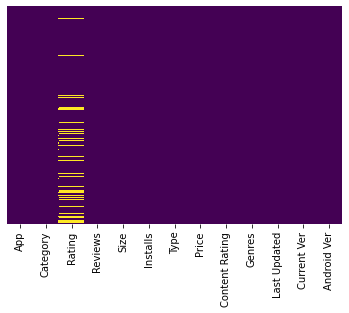

In [15]:
sns.heatmap(apps_df1.isna(),yticklabels=False,cbar=False,cmap='viridis');

In [16]:
apps_df1.fillna(0, inplace = True)

In [17]:
apps_df1.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

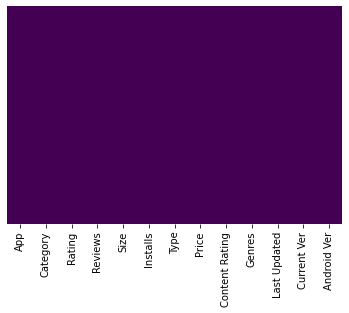

In [18]:
sns.heatmap(apps_df1.isna(),yticklabels=False,cbar=False,cmap='viridis');

**Hence, Heatmap shows that no NaN value is present.**

## <span style='color:blue'>Now we do not have any NaN value in out data set</span>

* **Replacing** : df.fillna(a, inplace = True), x may be any value even it is mean or median - if you want to replace it with mean values of the column then use a= app_df['col_name'].mean()
* **Deleting** : app_df.dropna(inplace = True) this will delete the entire row which has empty value init - inplace=True from deleting row in original dataframe


## <span style='background:pink'><span style='color :brown'>DELETING DUPLICATES</span></span>

In [19]:
apps_df1.drop_duplicates(inplace=True)

In [20]:
apps_df1.shape

(10358, 13)

In [21]:
apps_df.shape

(10841, 13)

<span style='color:red'>This show that in our original dataframe there are total 10841 row are present but in apps_df1 there are 10358 rows are present
>So about 483 duplicate rows are deleted from dataset</span>

### <span style='background:yellow'>COLUMNS of Our DATAFRAME</span>

In [22]:
apps_df1.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

Now we need to process the some columns like,
 * Size 
 * Installs 
 * Price
 
Because these columns contains some text along with Numerical values

###  <span style='background:skyblue'>**Converting Reviews column to numeric.**</span>


In [23]:
apps_df1[~apps_df1.Reviews.str.isnumeric()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,0,"February 11, 2018",1.0.19,4.0 and up,0


In [24]:
apps_df1=apps_df1.drop(apps_df.index[10472])

In [25]:
apps_df1['Reviews']=pd.to_numeric(apps_df1.Reviews)

In [26]:
apps_df1 = apps_df1.sort_values(by='Reviews', ascending=False)

In [27]:
apps_df1 = apps_df1.drop_duplicates(subset='App', keep="first")

### <font color=green>We have successfully converted all reviews into numeric values.
    

In [28]:
apps_df1.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2544,Facebook,SOCIAL,4.1,78158306,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"August 3, 2018",Varies with device,Varies with device
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
2604,Instagram,SOCIAL,4.5,66577446,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
382,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56646578,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
1879,Clash of Clans,GAME,4.6,44893888,98M,"100,000,000+",Free,0,Everyone 10+,Strategy,"July 15, 2018",10.322.16,4.1 and up


In [29]:
apps_df1.shape

(9659, 13)

### For Installs convert into numeric

In [30]:
apps_df1.Installs.value_counts()

1,000,000+        1417
100,000+          1113
10,000+           1030
10,000,000+        937
1,000+             887
100+               709
5,000,000+         607
500,000+           504
50,000+            469
5,000+             468
10+                385
500+               328
50,000,000+        204
50+                204
100,000,000+       189
5+                  82
1+                  67
500,000,000+        24
1,000,000,000+      20
0+                  14
0                    1
Name: Installs, dtype: int64

So we need to remove commas(,) and plus sign(+) before trying to converting to numeric

In [31]:
apps_df1.Installs=apps_df1.Installs.apply(lambda x: x.replace(',',''))

In [32]:
apps_df1.Installs=apps_df1.Installs.apply(lambda x: x.strip('+'))

In [33]:
apps_df1['Installs']=pd.to_numeric(apps_df1.Installs)

In [34]:
apps_df1['Installs'].sum()

75322526427

### It's Time for Size

In [35]:
apps_df1.Size.sort_values(ascending=False)

2544     Varies with device
402      Varies with device
8360     Varies with device
5581     Varies with device
144      Varies with device
                ...        
9973                   1.0M
10808                  1.0M
8077                   1.0M
5771                   1.0M
7074                   1.0M
Name: Size, Length: 9659, dtype: object

In [36]:
apps_df1.Size.value_counts()

Varies with device    1228
11M                    182
12M                    181
13M                    177
14M                    177
                      ... 
82k                      1
259k                     1
293k                     1
108k                     1
655k                     1
Name: Size, Length: 461, dtype: int64

It seems a little bit harder than the previous because we will need to replace 'Varies with device' with NaN, remove 'M','k' and commas and convert the size to MB to the Apps that are represented to KB. 

In [37]:
apps_df1['Size'] = apps_df1['Size'].apply(lambda x: str(x).replace('Varies with device', 'NaN') if 'Varies with device' in str(x) else x)

In [38]:
apps_df1['Size']=apps_df1['Size'].apply(lambda x:str(x).replace('M','')if 'M' in str(x) else str(x))
apps_df1['Size']=apps_df1['Size'].apply(lambda x:str(x).replace(',','')if 'M' in str(x) else str(x))

In [39]:
apps_df1['Size']=apps_df1['Size'].apply(lambda x:float(str(x).replace('k','')) / 1024 if 'k' in str(x) else str(x))

In [40]:
apps_df1['Size']=apps_df1['Size'].apply(lambda x:float(x))

## <span style='background:yellow'><span style='color:red'>Exploratory Analysis and Visualization</span></span>


In [41]:
apps_df1.describe()

,Rating,Reviews,Size,Installs
count,9659.000000,9.659000e+03,8431.000000,9.659000e+03
mean,3.541164,2.168041e+05,20.398075,7.798170e+06
std,1.575634,1.831430e+06,21.828959,5.376973e+07
min,0.000000,0.000000e+00,0.008301,0.000000e+00
25%,3.600000,2.500000e+01,4.600000,1.000000e+03
50%,4.200000,9.690000e+02,12.000000,1.000000e+05
75%,4.500000,2.945350e+04,28.000000,1.000000e+06
max,5.000000,7.815831e+07,100.000000,1.000000e+09


First import **matplotlib.pyplot** and **seaborn**. 

In [42]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

sns.set_style('whitegrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

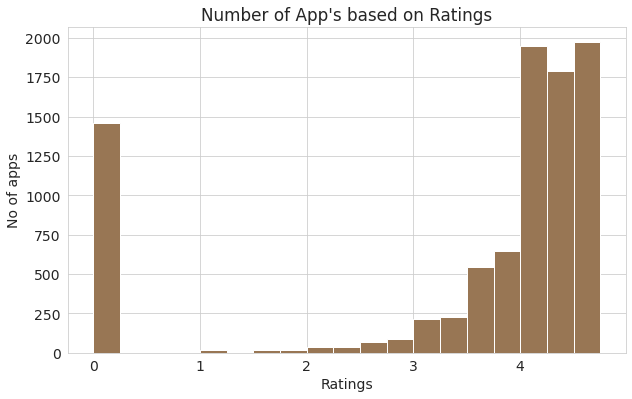

In [43]:
plt.title("Number of App's based on Ratings")


plt.xlabel('Ratings')
plt.ylabel('No of apps')
plt.hist(apps_df1.Rating,bins=np.arange(0,5,0.25) , color = '#987654')
plt.show()

## <span style='color:skyblue'><span style='background:black'>This show that maximum amount of apps has rating above 4 which is GOOD</span></span>

In [44]:
category = apps_df1.groupby('Category').count()
category['Genres'].head(5)

Category
ART_AND_DESIGN          61
AUTO_AND_VEHICLES       85
BEAUTY                  53
BOOKS_AND_REFERENCE    222
BUSINESS               420
Name: Genres, dtype: int64

##  <span style='background:black'><font color=yellow> Plotting  Bar Graph Between Categories and Installs of Apps</span>

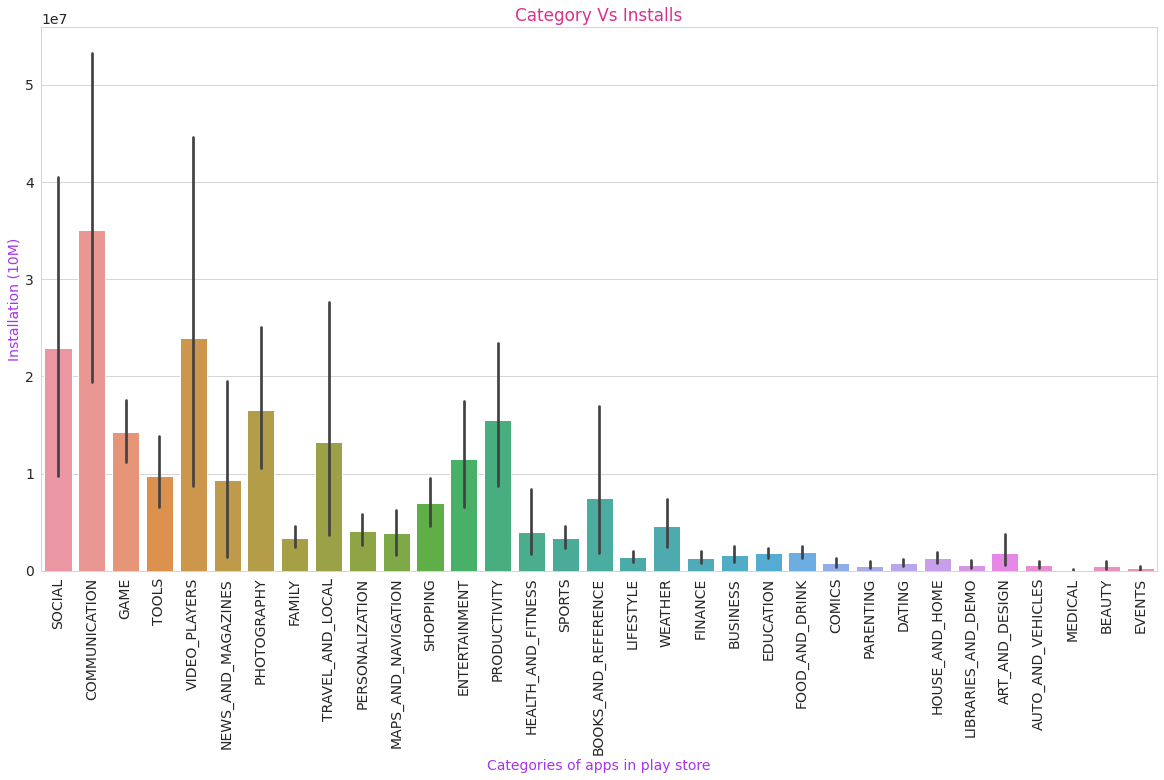

In [45]:
fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x='Category',y='Installs',data=apps_df1,ax=ax)
plt.xlabel("Categories of apps in play store",color='#a834eb')
plt.ylabel("Installation (10M)",color="#a834eb")
plt.title("Category Vs Installs",color="#db308e")
plt.xticks(rotation=90)
plt.show()

## <font color=purple> Looks like communication apps has huge deamand

In [46]:
apps_df1.groupby('Type').count()

,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
Type,,,,,,,,,,,,
0,1,1,1,1,0,1,1,1,1,1,1,1
Free,8904,8904,8904,8904,7748,8904,8904,8904,8904,8904,8904,8904
Paid,754,754,754,754,683,754,754,754,754,754,754,754


> 1 value has 0 value (not having Free or Paid ) lets change them

In [47]:
apps_df1.query("Type!='Free' & Type!='Paid' ")

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,FAMILY,0.0,0,NaN,0,0,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


In [48]:
apps_df1.at[9148,'Type']='Paid'

In [49]:
apps_df1.groupby('Type').count()

,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
Type,,,,,,,,,,,,
Free,8904,8904,8904,8904,7748,8904,8904,8904,8904,8904,8904,8904
Paid,755,755,755,755,683,755,755,755,755,755,755,755


### <span style='background:black'><span style='color:skyblue'>Now we have perfect data lets plot a Ring/Donut chart showing the types of apps</span></span>

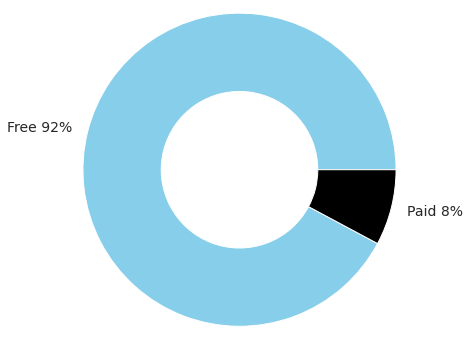

In [50]:
size_of_groups=[8904,755]

colors = ['skyblue','black']
mylabels = ["Free 92%","Paid 8%"]
my_pie,_ = plt.pie(size_of_groups,radius = 1.2,labels = mylabels,colors=colors)

plt.setp(my_pie, width=0.6, edgecolor='white') 

plt.show()

In [51]:
free_df = apps_df1[apps_df1.Type == 'Free']
paid_df = apps_df1[apps_df1.Type == 'Paid']

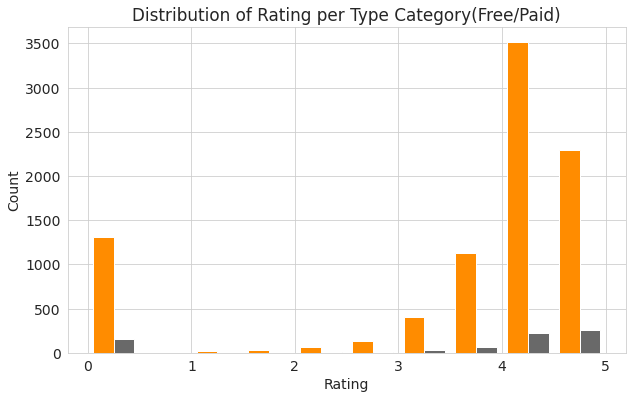

In [52]:
plt.title("Distribution of Rating per Type Category(Free/Paid)")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.hist([free_df.Rating,paid_df.Rating],color=['darkorange','dimgray']);

# <span style='background:yellow'><font color =green>Which Category has highest Installs</span>

In [53]:
category_group = apps_df1.groupby('Category').sum().sort_values(by='Installs',ascending=False)

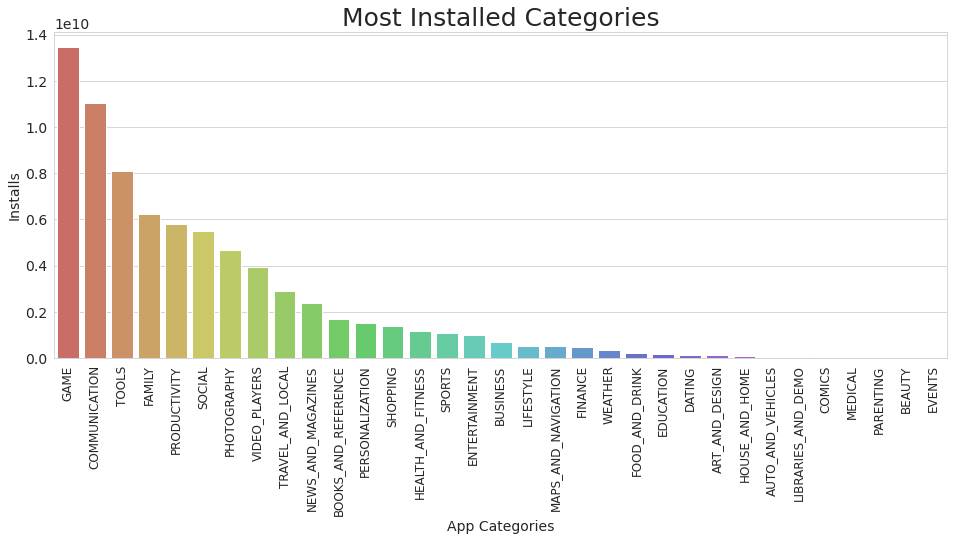

In [54]:
plt.figure(figsize=(16,6))
plo = sns.barplot(x=category_group.index,y='Installs',data=category_group,palette="hls")
plo.set_xlabel('App Categories')
plo.set_ylabel('Installs')
plo.set_xticklabels(plo.get_xticklabels(), rotation=90, fontsize=12)
plo.set_title("Most Installed Categories", fontsize = 25)
plt.show()

## <span style='background:black'> <font color='darkorange'>Let's see which category has highest number of Rating</span>

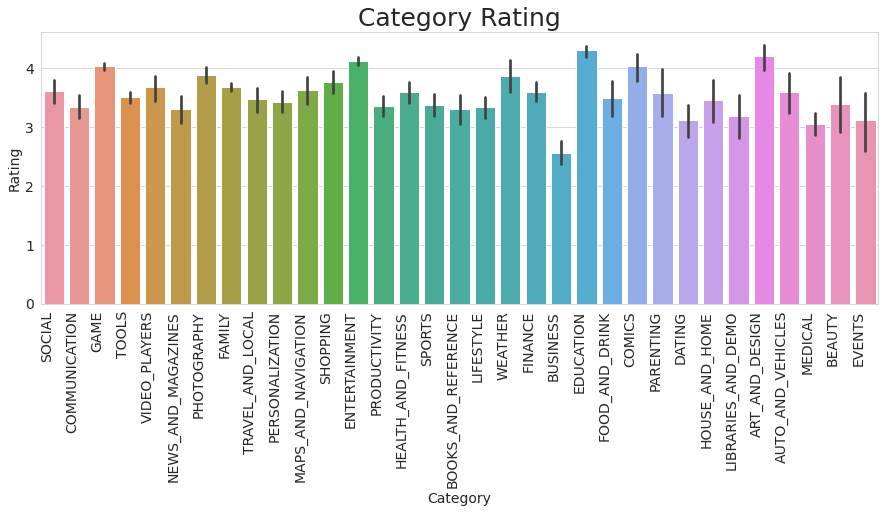

In [55]:
plt.figure(figsize=(15,5))
rat = sns.barplot(x=apps_df1['Category'],y=apps_df1['Rating'],data=apps_df1)
rat.set_xticklabels(rat.get_xticklabels(), rotation=90, ha="right")
plt.title('Category Rating',fontsize=25)
plt.show()

## <font color=purple>Number of Apps Based on Categories

In [56]:
category = apps_df1.groupby('Category').count()
values=np.array(category['Genres'].values)
heading=np.array(list(category['Genres'].index))

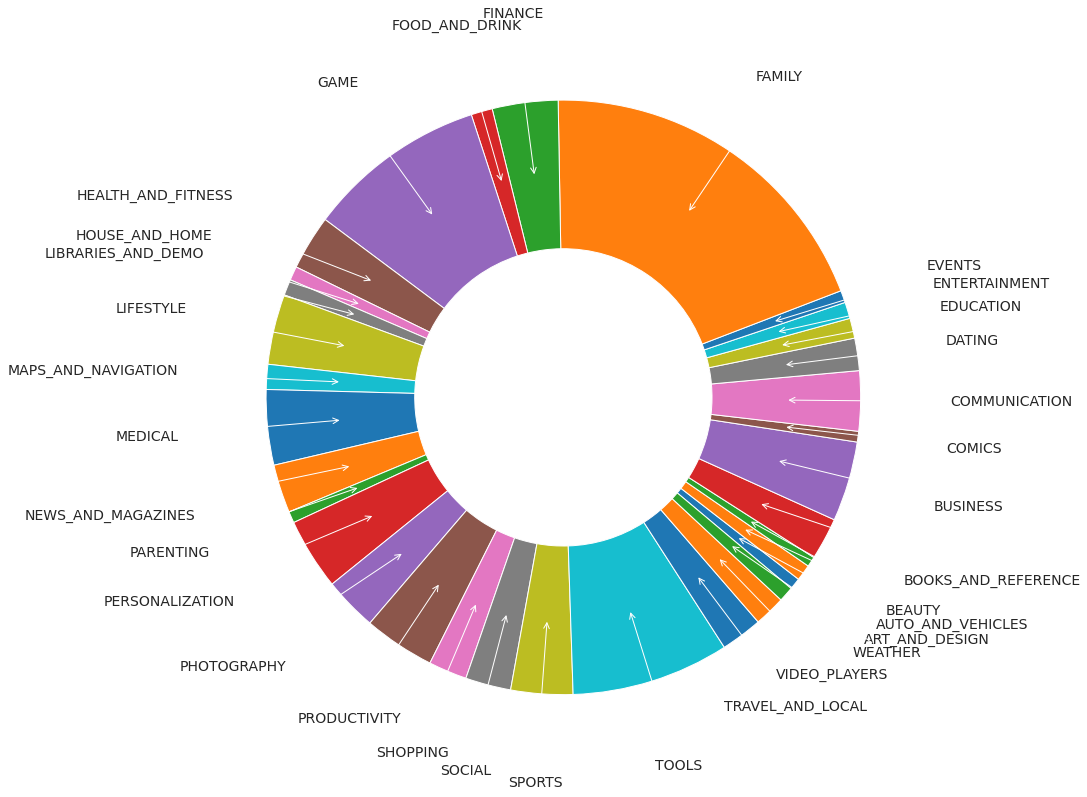

In [57]:
import matplotlib.colors as colors
import matplotlib.cm as cmx


labels = heading
sizes = values

fig, ax = plt.subplots(figsize=(15, 15), subplot_kw=dict(aspect="equal"))

wedges, texts = ax.pie(sizes, wedgeprops=dict(width=0.5), startangle=-40)

kw = dict(arrowprops=dict(arrowstyle="->"), va="center")
for p, label in zip(wedges, labels):
    ang = np.deg2rad((p.theta1 + p.theta2)/2)
    y = np.sin(ang)
    x = np.cos(ang)
    horizontalalignment = "center" if abs(x) < abs(y) else "right" if x < 0 else "left"
    ax.annotate(label, xy=(0.75*x, 0.75*y), xytext=(1.3*x, 1.3*y),
                horizontalalignment=horizontalalignment, **kw)
plt.tight_layout()

plt.show()

## <span style='background:pink'><font color=brown> As Pie chart shows that most of the apps on google playstore are of category</span>
* **FAMILY**
* **GAMES**
* **TOOLS**

# <span style='background:darkorange'>Lets check what kind of content is mostly available on playstore</span>

In [58]:
apps_df1.groupby(['Content Rating']).count()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Genres,Last Updated,Current Ver,Android Ver
Content Rating,,,,,,,,,,,,
Adults only 18+,3,3,3,3,2,3,3,3,3,3,3,3
Everyone,7903,7903,7903,7903,6916,7903,7903,7903,7903,7903,7903,7903
Everyone 10+,322,322,322,322,273,322,322,322,322,322,322,322
Mature 17+,393,393,393,393,340,393,393,393,393,393,393,393
Teen,1036,1036,1036,1036,898,1036,1036,1036,1036,1036,1036,1036
Unrated,2,2,2,2,2,2,2,2,2,2,2,2


In [59]:
content = apps_df1.groupby('Content Rating').count()
values=np.array(content['Genres'].values)
heading =np.array(list([content['Genres'].index]))
headings=np.array(heading[0])
print(headings)
print(values)

['Adults only 18+' 'Everyone' 'Everyone 10+' 'Mature 17+' 'Teen' 'Unrated']
[   3 7903  322  393 1036    2]


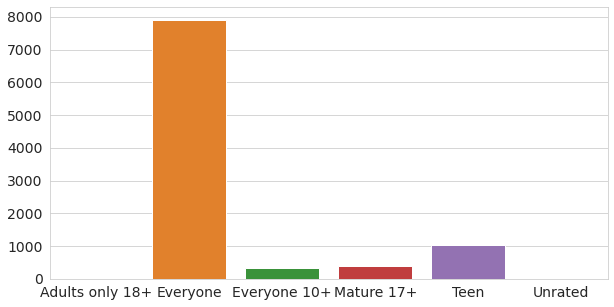

In [60]:
plt.figure(figsize=(10,5))
rat1 = sns.barplot(x=headings,y=values,data=apps_df1)
plt.show()

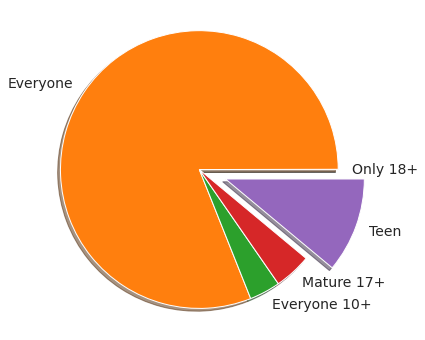

In [61]:
labels = ['Only 18+', 'Everyone', 'Everyone 10+' ,'Mature 17+', 'Teen']
sizes = [3 ,8382 , 373,  447 ,1143]

fig1, ax1 = plt.subplots()
fig1.set_size_inches(6,6)
myexplode = [0, 0, 0, 0,0.2]
ax1.pie(sizes,  labels=labels, autopct='',
        shadow=True, startangle=0, explode = myexplode)
ax1.axis('equal')  


plt.savefig('real.png', bbox_inches = 'tight', pad_inches = 0)
myexplode = [0.2, 0, 0, 0]
plt.show()

### <font color=purple>From the graph we can say , ther are plenty of apps in playstore, every one can access and very few apps related to adults


### <span style='background:pink'><span style='color:blue'> Highly reviewd apps accross all categories.</span></span>

In [62]:
highly_reviewd_apps = apps_df1.sort_values(by=['Reviews'],ascending=False).head(25)

In [63]:
highly_reviewd_apps

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2544,Facebook,SOCIAL,4.1,78158306,NaN,1000000000,Free,0,Teen,Social,"August 3, 2018",Varies with device,Varies with device
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,NaN,1000000000,Free,0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
2604,Instagram,SOCIAL,4.5,66577446,NaN,1000000000,Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
382,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56646578,NaN,1000000000,Free,0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
1879,Clash of Clans,GAME,4.6,44893888,98.0,100000000,Free,0,Everyone 10+,Strategy,"July 15, 2018",10.322.16,4.1 and up
4005,Clean Master- Space Cleaner & Antivirus,TOOLS,4.7,42916526,NaN,500000000,Free,0,Everyone,Tools,"August 3, 2018",Varies with device,Varies with device
1872,Subway Surfers,GAME,4.5,27725352,76.0,1000000000,Free,0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up
3665,YouTube,VIDEO_PLAYERS,4.3,25655305,NaN,1000000000,Free,0,Teen,Video Players & Editors,"August 2, 2018",Varies with device,Varies with device
7536,"Security Master - Antivirus, VPN, AppLock, Boo...",TOOLS,4.7,24900999,NaN,500000000,Free,0,Everyone,Tools,"August 4, 2018",4.6.6,Varies with device
1878,Clash Royale,GAME,4.6,23136735,97.0,100000000,Free,0,Everyone 10+,Strategy,"June 27, 2018",2.3.2,4.1 and up


In [64]:
highly_reviewd_apps.shape

(25, 13)

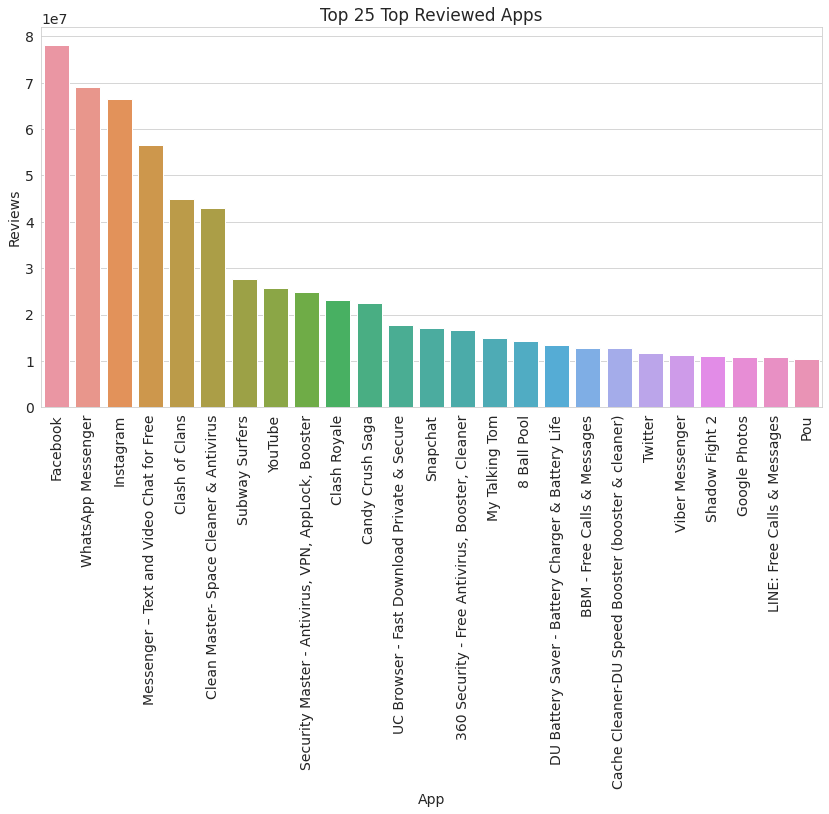

In [65]:
plt.figure(figsize=(14,7))
plt.xticks(rotation=90)
plt.xlabel("Top_Reviewed_Apps")
plt.ylabel("Reviews")
plt.title("Top 25 Top Reviewed Apps")
sns.barplot(x=highly_reviewd_apps.App,y=highly_reviewd_apps.Reviews)
plt.show()

## <font color=blue><span style='background:lightgreen'> This shows that Top 3 reviewed are Social Media Apps.</span>

## <span style='background:RED'><font color=brown>Now we will prepare our data and implement random forest ml model :</span>
* **first clear all necessary non numerical values**
* **implement our machine learning model using our cleared data**
* **Obtain absolute mean error of every catagory and estimate median rating using our model**

In [66]:
from sklearn.preprocessing import LabelEncoder
# Label encoding
lb_make = LabelEncoder()
# Create column for "numeric" Content Rating 
apps_df1["Content Rating NUM"] = lb_make.fit_transform(apps_df1["Content Rating"])
# Form dicitonary for Content Rating and numeric values 
dict_content_rating = {"Adults only 18+": 0, "Everyone": 1, "Everyone 10+": 2, "Mature 17+": 3, "Teen": 4}
# Numeric value for Content Rating
'''
Adults only 18+ = 0
Everyone = 1
Everyone 10+ = 2
Mature 17+ = 3
Teen = 4
'''
# Create column for "numeric" Category
apps_df1["Category NUM"] = lb_make.fit_transform(apps_df1["Category"])
# Form dicitonary for Category and numeric values
dict_category = {}
val = 0
for i in apps_df1["Category"].unique():
 dict_category[i] = val
 val += 1
# Numeric value for Category
'''
ART_AND_DESIGN = 0
AUTO_AND_VEHICLES = 1
BEAUTY = 2 
BOOKS_AND_REFERENCE = 3
BUSINESS = 4
COMICS = 5
COMMUNICATION = 6
DATING = 7
EDUCATION = 8
ENTERTAINMENT = 9
EVENTS = 10
FAMILY = 11
FINANCE = 12
FOOD_AND_DRINK = 13
GAME = 14
HEALTH_AND_FITNESS = 15
HOUSE_AND_HOME = 16
LIBRARIES_AND_DEMO = 17
LIFESTYLE = 18
MAPS_AND_NAVIGATION = 19
MEDICAL = 20
NEWS_AND_MAGAZINES = 21
PARENTING = 22
PERSONALIZATION = 23
PHOTOGRAPHY = 24
PRODUCTIVITY = 25
SHOPPING = 26
SOCIAL = 27
SPORTS = 28
TOOLS = 29
TRAVEL_AND_LOCAL = 30
VIDEO_PLAYERS = 31
WEATHER = 32
'''

'\nART_AND_DESIGN = 0\nAUTO_AND_VEHICLES = 1\nBEAUTY = 2 \nBOOKS_AND_REFERENCE = 3\nBUSINESS = 4\nCOMICS = 5\nCOMMUNICATION = 6\nDATING = 7\nEDUCATION = 8\nENTERTAINMENT = 9\nEVENTS = 10\nFAMILY = 11\nFINANCE = 12\nFOOD_AND_DRINK = 13\nGAME = 14\nHEALTH_AND_FITNESS = 15\nHOUSE_AND_HOME = 16\nLIBRARIES_AND_DEMO = 17\nLIFESTYLE = 18\nMAPS_AND_NAVIGATION = 19\nMEDICAL = 20\nNEWS_AND_MAGAZINES = 21\nPARENTING = 22\nPERSONALIZATION = 23\nPHOTOGRAPHY = 24\nPRODUCTIVITY = 25\nSHOPPING = 26\nSOCIAL = 27\nSPORTS = 28\nTOOLS = 29\nTRAVEL_AND_LOCAL = 30\nVIDEO_PLAYERS = 31\nWEATHER = 32\n'

We assigned each and every caterogy value to a numeric one so that it can be assessed in our ml model

In [67]:
from sklearn.impute import SimpleImputer
# Replace "NaN" with mean 
imputer = SimpleImputer()
apps_df1['Rating'] = imputer.fit_transform(apps_df1[['Rating']])
# Rounding the mean value to 1 decimal place
apps_df1['Rating'].round(1)
apps_df1.dropna(axis=0, inplace=True)

In [68]:
# Data cleaning for "Price" column
apps_df1['Price'] = apps_df1['Price'].map(lambda x: x.lstrip('$').rstrip())
# Row [7312,8266] removed due to "Unrated" value in Content Rating
apps_df1.drop(apps_df1.index[[7312,8266]], inplace=True)

In [69]:
# Change datatype
apps_df1['Reviews'] = pd.to_numeric(apps_df1['Reviews'])
apps_df1['Installs'] = pd.to_numeric(apps_df1['Installs'])
apps_df1['Price'] = pd.to_numeric(apps_df1['Price'])

In [70]:
# Replace "NaN" with mean 
imputer = SimpleImputer()
apps_df1['Rating'] = imputer.fit_transform(apps_df1[['Rating']])
# Rounding the mean value to 1 decimal place
apps_df1['Rating'].round(1)
apps_df1.dropna(axis=0, inplace=True)

### <span style='background:green'><span style='color:black'> Importing and implementing our ml model.</span></span>

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [72]:
# Features selection
features = ['Category NUM', 'Reviews', 'Size', 'Installs', 'Price', 'Content Rating NUM']
X = apps_df1[features]
# Label selection
y = apps_df1.Rating
# For testing purpose
train_X, test_X, train_y, test_y = train_test_split(X, y)

Splitting our model into train and test data

In [73]:
from sklearn.metrics import mean_absolute_error 
# Loop is used to get more generalized result
total_sum = []
for i in range(10):
 # Hypertuning of parameters for better prediction
 forest_model = RandomForestRegressor(n_estimators=100, max_features=3, min_samples_leaf=10)
 forest_model.fit(X, y)
 # For testing purpose
 forest_model.fit(train_X, train_y)
 # Pass values to get prediction for ratings
 value_1 =  4    # Category NUM
 value_2 = 100000     #Reviews
 value_3 =  20    #Size
 value_4 =  1000000    #Installs
 value_5 =  5    #Price
 value_6 =   1   #Content Rating NUM
 forest_pred = forest_model.predict([[value_1,value_2,value_3,value_4,value_5,value_6]]) ##values entered as an example;
 total_sum.append(forest_pred)
 # For testing purpose
 forest_pred = forest_model.predict(test_X)
 print(mean_absolute_error(forest_pred, test_y))

0.6844812125601757
0.6822865773954452
0.6801339203158135
0.6825526788177344
0.6809418398031947
0.6814972257419719
0.6808408417027462
0.6806744644069959
0.6818983085861128
0.6827346076381406


We get the mean absolute error as approximately ~0.68

In [74]:
print(round(np.median(total_sum), 2))


4.42


after using mean_absolute_error, the error is “0.68”. For eg., if the actual rating of the app is “4.0”, then the predicted ratings could fall in the range [3.3,4.6].

## Inferences and Conclusion

We have sucessfully completed data analysis on google playstore data obtained from kaggle by first cleaning the data and then performing exploratory data analysis on it . 
>*Looking at the analysis it can be inferred that most apps on the play store are free , the apps are targeted towards a "family-friendly" model and the most installed apps on the platform are of social media giants like facebook and instagam.
*It can also be inferred that most apps with highest rating belong in the gaming category.

## References and Future Work

Most of the techniques and methods used here can be obtained via freecodecamp.